In [53]:
library("gRain")
library("Rgraphviz")
#library("dagitty")
library("bnlearn")

In [69]:
#setwd("/Users/lisa/Documents/Uni/03.SemesterMaster/BN/bn17")
setwd("/Users/apple1/Dropbox/Uni/Nijmegen/WS17_18/BN")
d <- read.table(header=T, sep=",", 'adult_cleaned.csv')
d[d=="?"]<-NA
d <- d[complete.cases(d),]
d <- data.frame(d)
d <- subset(d, select = -c(native.country) )

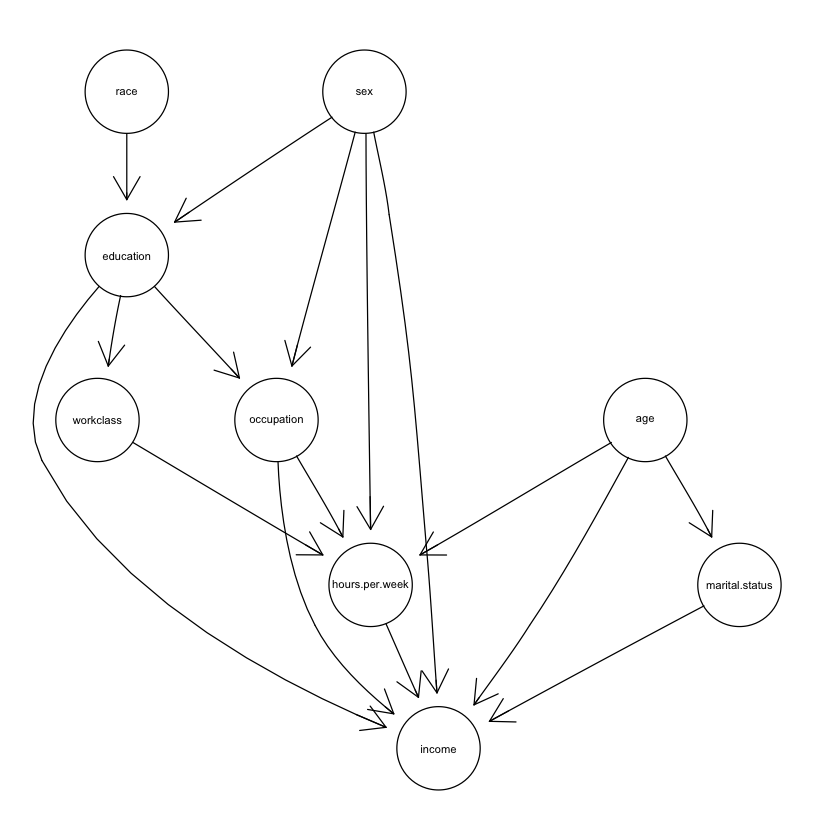

In [54]:
our_network <- dag(~ race + education:race:sex + workclass:education + hours.per.week:workclass:occupation:age:sex + occupation:education:sex + marital.status:age + income:age:sex:occupation:hours.per.week:education:marital.status)
plot(our_network)

In [57]:
bn_our_network = as.bn(our_network)

In [71]:
d$age <- as.ordered(d$age)
d$workclass <- as.factor(d$workclass)
d$education <- as.factor(d$education)
d$marital.status <- as.factor(d$marital.status)
d$occupation <- as.factor(d$occupation)
d$race <- as.factor(d$race)
d$sex <- as.factor(d$sex)
d$hours.per.week <- as.ordered(d$hours.per.week)
d$income <- as.ordered(d$income)

Warning message in check.score(score, x):
“no score is available for ordinal data, disregarding the ordering of the levels.”


  Bayesian network learned via Hybrid methods

  model:
   [age][race][hours.per.week][education|age][marital.status|age]
   [native.country|race][sex|marital.status][income|marital.status]
   [occupation|education:sex][workclass|occupation]
  nodes:                                 10 
  arcs:                                  8 
    undirected arcs:                     0 
    directed arcs:                       8 
  average markov blanket size:           1.80 
  average neighbourhood size:            1.60 
  average branching factor:              0.80 

  learning algorithm:                    Max-Min Hill-Climbing 
  constraint-based method:               Max-Min Parent Children 
  conditional independence test:         Mutual Information (disc.) 
  score-based method:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  alpha threshold:                       0.05 
  penalization coefficient:              5.157169 
  tests used in the learning pr

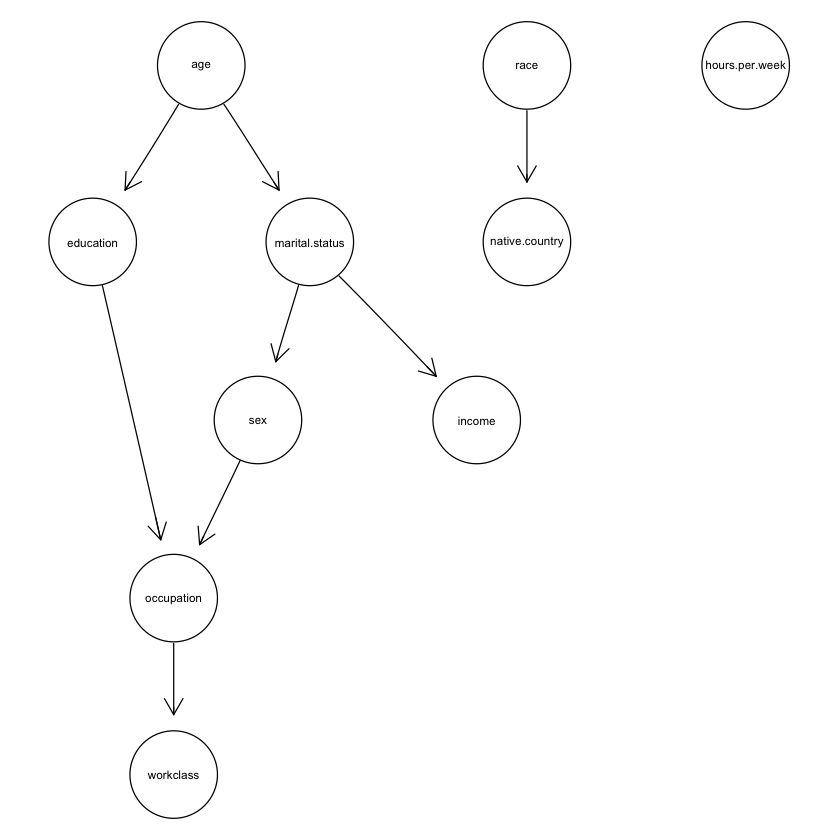

In [20]:
pdag = mmhc(d)
graphviz.plot(pdag)
pdag

Warning message in check.score(score, x):
“no score is available for ordinal data, disregarding the ordering of the levels.”


  Bayesian network learned via Score-based methods

  model:
   [age][marital.status|age][race|marital.status][income|age:marital.status]
   [education|age:income][hours.per.week|age:income]
   [sex|marital.status:hours.per.week][native.country|education:race]
   [occupation|education:sex:income][workclass|occupation:sex]
  nodes:                                 10 
  arcs:                                  17 
    undirected arcs:                     0 
    directed arcs:                       17 
  average markov blanket size:           4.20 
  average neighbourhood size:            3.40 
  average branching factor:              1.70 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              5.157169 
  tests used in the learning procedure:  216 
  optimized:                             TRUE 


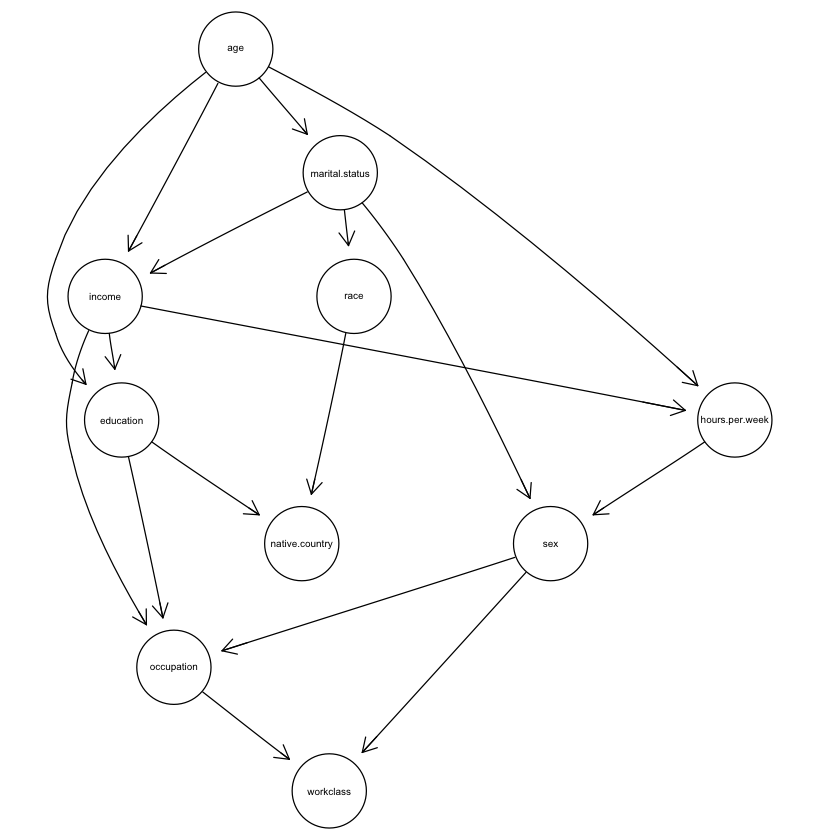

In [18]:
pdag = hc(d)
graphviz.plot(pdag)
pdag

Warning message in check.score(score, x):
“no score is available for ordinal data, disregarding the ordering of the levels.”


  Bayesian network learned via Score-based methods

  model:
   [race][marital.status|race][income|marital.status][age|marital.status:income]
   [education|age:income][hours.per.week|age:income]
   [sex|marital.status:hours.per.week][native.country|education:race]
   [occupation|education:sex:income][workclass|occupation:sex]
  nodes:                                 10 
  arcs:                                  17 
    undirected arcs:                     0 
    directed arcs:                       17 
  average markov blanket size:           4.20 
  average neighbourhood size:            3.40 
  average branching factor:              1.70 

  learning algorithm:                    Tabu Search 
  score:                                 BIC (disc.) 
  penalization coefficient:              5.157169 
  tests used in the learning procedure:  405 
  optimized:                             TRUE 


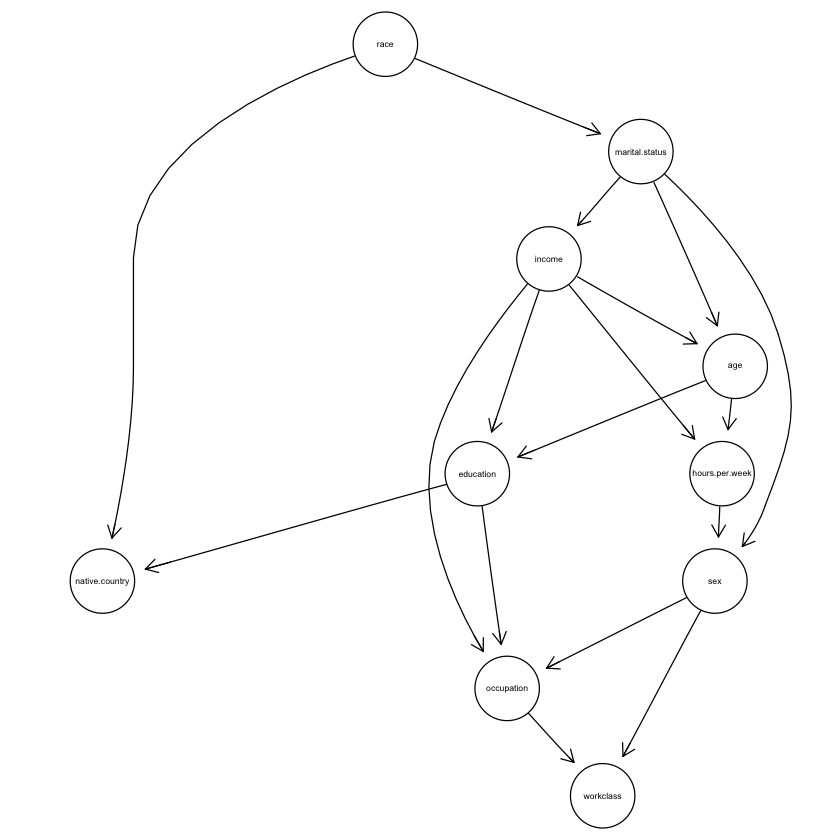

In [25]:
pdag = tabu(d)
graphviz.plot(pdag)
pdag

# Define Metric

In [50]:
metric <- function(net1, net2){
    return(compare(net1,net2))
}

# Test parameters

## Fast Incremental Association
### Define parameters values

In [201]:
# test: mutual information, shrinkage estimator for the mutual information, and Pearson's X^2
ind_tests = c('mi', 'mi-sh', 'x2')
alpha = c(0.01, 0.05, 0.1)
combinations = expand.grid(ind_tests, alpha)

In [202]:
#Suppress warnings when trying to apply v-structures
options( warn = -1 )

dags <- list()
values <- list()
for(i in 1:nrow(combinations)){
    params <- combinations[i,]
    pdag <- fast.iamb(d, test=as.character(params[[1]]), alpha=params[[2]])
    dags <- append(dags, list(pdag))
    values[i] <- list(metric(pdag, bn_our_network))
    print(paste(values[i]))
}
options( warn = 0 )

[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 1, fp = 15, fn = 10)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 1, fp = 15, fn = 10)"


In [203]:
# Check whether graphs are different from each other
equals = c()
for(i in 1:(nrow(combinations)-1)){
    # We do not have to recheck graphs that are equal to already tested once
    if(i %in% equals){
        next
    }
    for(j in (i+1):nrow(combinations)){
        if(j %in% equals){
            next
        }
        eq <- all.equal(dags[[i]], dags[[j]])
        if(eq == 'TRUE'){
            equals = c(equals,j)
        }
        if(eq != 'TRUE'){
            print(c(i,j))
        }
    }
}

[1] 1 3
[1] 1 6
[1] 1 9
[1] 3 6
[1] 3 9


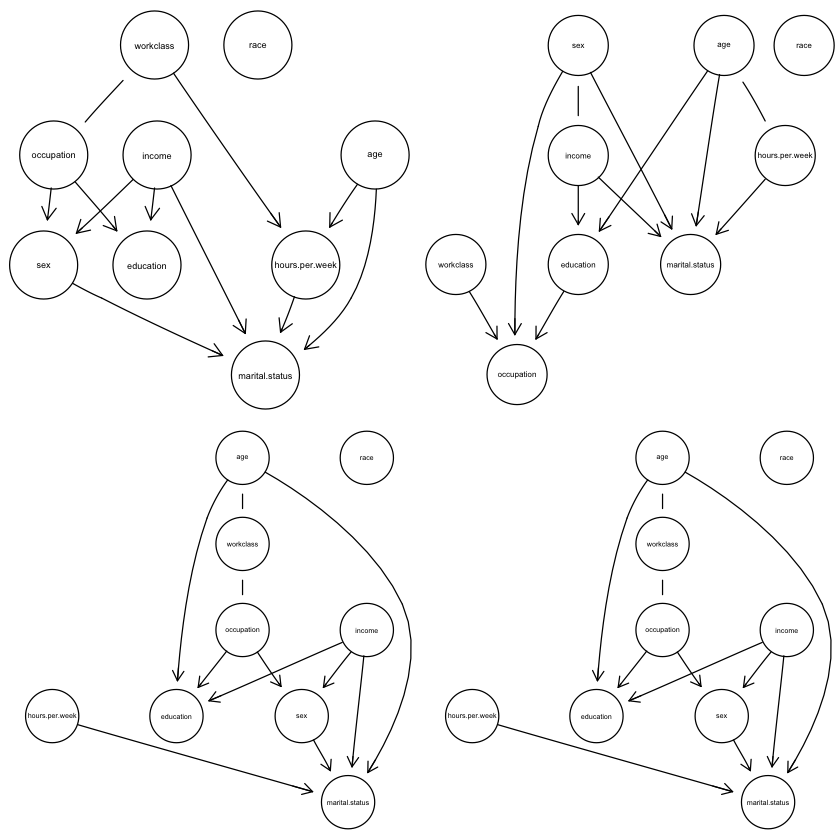

In [171]:
par(mfrow=c(2,2))
graphviz.plot(dags[[1]])
graphviz.plot(dags[[3]])
graphviz.plot(dags[[6]])
graphviz.plot(dags[[9]])


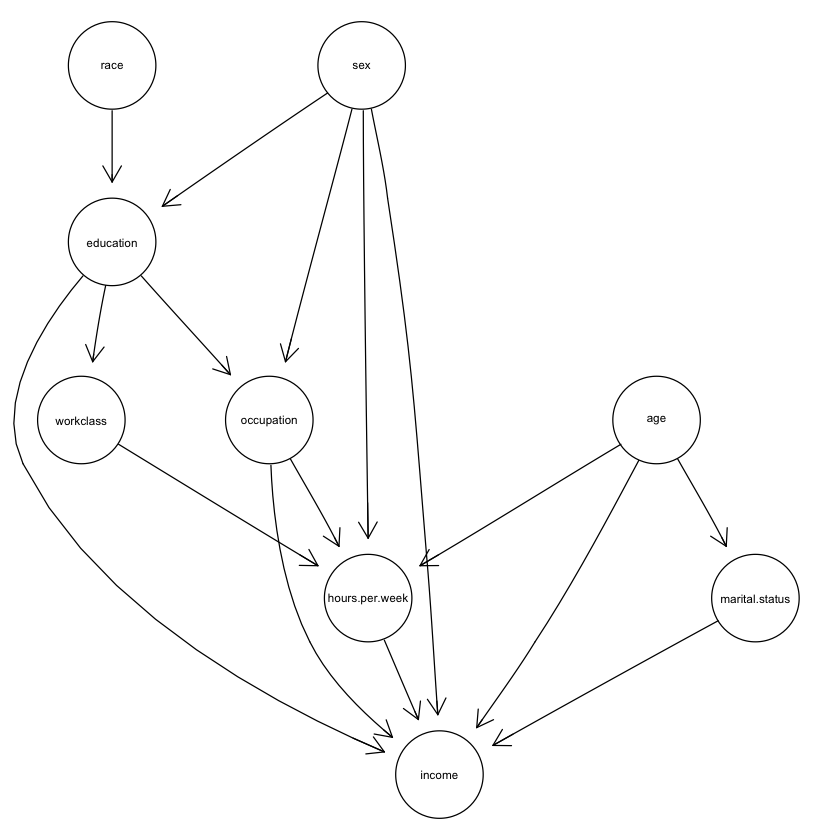

In [170]:
graphviz.plot(bn_our_network)

In [194]:
print(paste(values[1]))
print(paste(values[3]))
print(paste(values[6]))
print(paste(values[9]))

[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 3, fp = 13, fn = 8)"
[1] "list(tp = 1, fp = 15, fn = 10)"
[1] "list(tp = 1, fp = 15, fn = 10)"
